In [1]:
import numpy as np
from keras.datasets import imdb
import keras
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
max_features = 1000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
max_sequence_length = 50
padded_inputs = pad_sequences(x_train, maxlen=max_sequence_length, value = 0.0)
padded_inputs_test = pad_sequences(x_test, maxlen=max_sequence_length, value = 0.0)

for i in np.random.randint(0, len(padded_inputs), 3):
  INDEX_FROM = 3
  word_to_id = imdb.get_word_index()
  word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
  word_to_id["<PAD>"] = 0
  word_to_id["<START>"] = 1
  word_to_id["<UNK>"] = 2
  word_to_id["<UNUSED>"] = 3

  id_to_word = {value:key for key,value in word_to_id.items()}
  print('=================================================')
  print(f'Sample = {i} | Length = {len(padded_inputs[i])}')
  print('=================================================')
  print(' '.join(id_to_word[id] for id in padded_inputs[i] ))

1641221/1641221 [==============================] - 0s 0us/step
Sample = 6966 | Length = 50
and don't get <UNK> off by the <UNK> episodes the acting throughout is excellent but why have 5 <UNK> <UNK> why all this means is that there will be no <UNK> for at least 4 years oh well i'll keep watching if it keeps the <UNK> up and dialogue <UNK>
Sample = 4752 | Length = 50
<UNK> only one scene <UNK> in the entire movie <UNK> if they're not well <UNK> appears <UNK> <UNK> br br side note i found the first movie to be only <UNK> entertaining <UNK> different comic <UNK> there it seems br br i give it a 7 <UNK> <UNK> good fun
Sample = 22261 | Length = 50
even actors e <UNK> <UNK> <UNK> so to <UNK> it girl <UNK> <UNK> <UNK> <UNK> <UNK> actors a non <UNK> plot the <UNK> to use bad <UNK> in order to <UNK> love <UNK> too bad the idea was good though and i am seriously <UNK> myself from <UNK> the title


In [3]:
len(padded_inputs)

25000

In [4]:
len(x_test)

25000

In [5]:
padded_inputs.shape

(25000, 50)

In [6]:
class LSTM_Model:
  def __init__(self, max_features = 10000, embedding_size = 128, layers = [], units = [],
               activations = [], bidirectional = False, batch_size = 1, learning_rate = 0.01):

    self.max_features = max_features
    self.bidirectional = bidirectional
    self.activations = activations
    self.batch_size = batch_size
    self.learning_rate = learning_rate
    self.embedding_size = embedding_size
    self.layers = layers
    self.units = units

    self.model = keras.models.Sequential()
    self.model.add(keras.layers.Embedding(max_features, embedding_size))

    for i in range(len(layers)):

      layer = layers[i]
      unit = units[i]
      activation = activations[i]

      if not bidirectional:
        if layer == 'lstm':
          if 'lstm' not in layers[i+1:]:
            self.model.add(keras.layers.LSTM(unit, activation = activation))
          else:
            self.model.add(keras.layers.LSTM(unit, activation = activation, return_sequences = True))
      else:
        if layer == 'lstm':
          if 'lstm' not in layers[i+1:]:
            self.model.add(keras.layers.Bidirectional(keras.layers.LSTM(unit, activation = activation)))
          else:
            self.model.add(keras.layers.Bidirectional(keras.layers.LSTM(unit, activation = activation, return_sequences = True)))

    self.model.add(keras.layers.Dense(1, activation = activations[-1]))
    self.model.summary()

  def fit(self, x_train, y_train, x_test, y_test, epoch = 5):

    self.model.compile(loss = 'binary_crossentropy',
                       optimizer = keras.optimizers.Adam(learning_rate = self.learning_rate), metrics = ['accuracy'])

    self.history = self.model.fit(x_train, y_train, batch_size = self.batch_size,
                                    epochs = epoch, validation_data=(x_test, y_test))

  def output(self, model):
    plt.plot(self.history.history["loss"], label = "Train_Loss for model:" + model)
    plt.plot(self.history.history["val_loss"], label="Valid_Loss for model:" + model)
    plt.legend()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         1280000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
500/500 [==============================] - 68s 127ms/step - loss: 0.5404 - accuracy: 0.7152 - val_loss: 0.4495 - val_accuracy: 0.7864
Epoch 2/5
500/500 [==============================] - 57s 115ms/step - loss: 0.4368 - accuracy: 0.7938 - val_loss: 0.4796 - val_accuracy: 0.7757
Epoch 3/5
500/500 [=

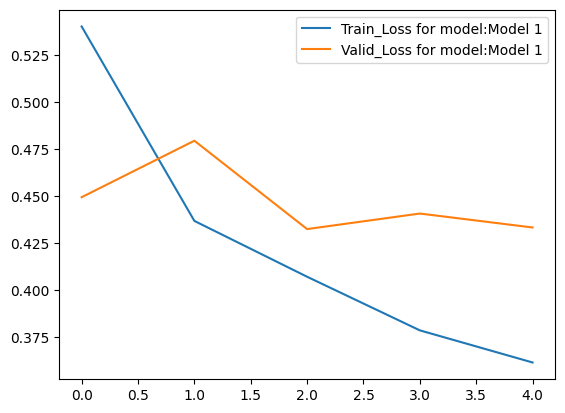

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import math
import pickle
import itertools, math
import time
import array
import csv
import codecs
import random
import os

model1 = LSTM_Model(layers = ['lstm'], units = [64], activations = ['sigmoid', 'sigmoid'], learning_rate = 0.01, batch_size = 50)
model1.fit(padded_inputs, y_train, padded_inputs_test, y_test)
model1.output('Model 1')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
500/500 [==============================] - 113s 222ms/step - loss: 0.5390 - accuracy: 0.7122 - val_loss: 0.4474 - val_accuracy: 0.7932
Epoch 2/5
500/500 [==============================] - 94s 187ms/step - loss: 0.4281 - accuracy: 0.

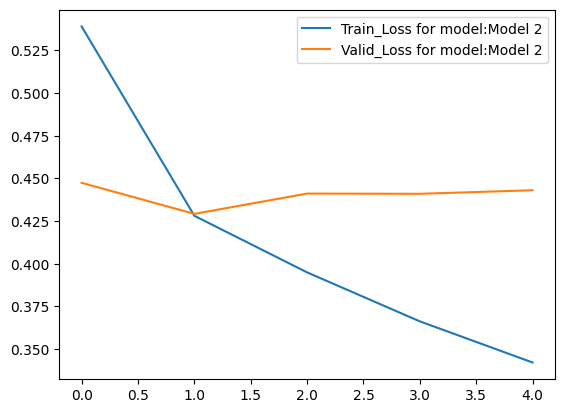

In [9]:
model2 = LSTM_Model(layers = ['lstm'], units = [64], activations = ['sigmoid', 'sigmoid'],
                    learning_rate = 0.01, batch_size = 50, bidirectional = True)
model2.fit(padded_inputs, y_train, padded_inputs_test, y_test)
model2.output('Model 2')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         1280000   
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,477,761
Trainable params: 1,477,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
500/500 [=========================

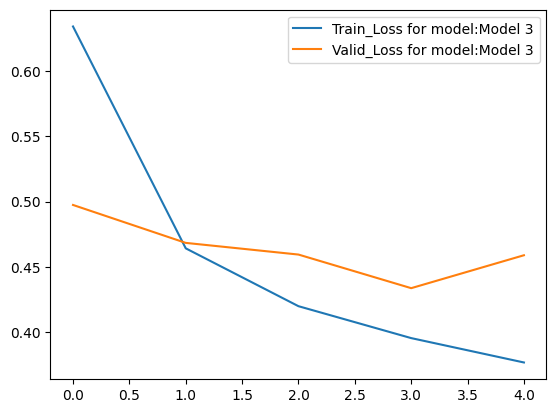

In [10]:
model3 = LSTM_Model(layers = ['lstm', 'lstm'], units = [64, 64], activations = ['sigmoid', 'sigmoid', 'sigmoid'],
                    learning_rate = 0.01, batch_size = 50, bidirectional = True)
model3.fit(padded_inputs, y_train, padded_inputs_test, y_test)
model3.output('Model 3')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 128)         1280000   
                                                                 
 bidirectional_3 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,420,097
Trainable params: 1,420,097
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
500/500 [=========================

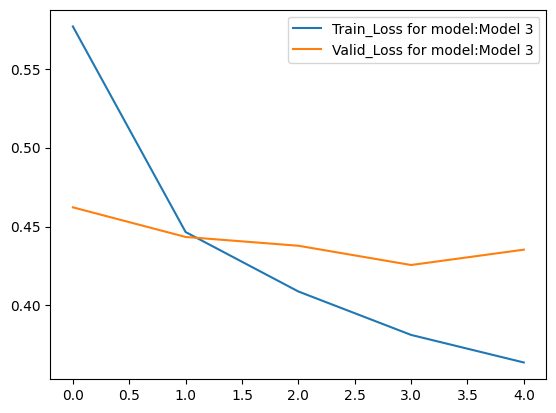

In [11]:
model4 = LSTM_Model(layers = ['lstm', 'lstm'], units = [64, 32], activations = ['sigmoid', 'sigmoid', 'sigmoid'],
                    learning_rate = 0.01, batch_size = 50, bidirectional = True)
model4.fit(padded_inputs, y_train, padded_inputs_test, y_test)
model4.output('Model 3')